<a href="https://colab.research.google.com/github/hutch-gwc/Rosalind/blob/master/secondarystructure_190219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Secondary Structure and DMS Data
-----

In [5]:
import pandas as pd
from scipy.stats import entropy
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

Get RSA Data
----

In [6]:
RSA = pd.read_csv("https://raw.githubusercontent.com/hutch-gwc/Rosalind/master/rsa.csv")  # read the data
RSA.drop(['index'], axis=1, inplace=True)  # drop column we don't need
RSA = RSA[RSA.protein == "Flu"]  # we only want the flu protein
RSA.drop(['protein'], axis=1, inplace=True)  # we don't need the protein column any more
RSA.head()

,site,RSA
530,18,0.170984
531,19,0.168605
532,20,0.000000
533,21,0.077844
534,22,0.005076


Get Preference Data
-----

In [7]:
prefs = pd.read_csv("https://raw.githubusercontent.com/hutch-gwc/Rosalind/master/HA_prefs_wt.csv")  # read in the data 
prefs.head()

,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,site,wt
0,0.050522,0.292074,0.041984,0.069723,0.112054,0.070729,0.207317,0.172276,0.175882,0.170153,...,0.095909,0.145664,0.068147,0.169200,0.216658,0.183667,0.070102,0.282156,1,K
1,0.299156,0.092621,0.193645,0.147577,0.093380,0.048215,0.110770,0.303162,0.100233,0.172399,...,0.130529,0.103289,0.232608,0.080003,0.153042,0.209860,0.049683,0.175782,2,A
2,0.282239,0.054260,0.075008,0.115239,0.052471,0.070930,0.090155,0.078627,0.245923,0.158548,...,0.086427,0.165511,0.145599,0.226275,0.227845,0.169360,0.081525,0.108752,3,K
3,0.285097,0.571661,0.023748,0.078999,0.264428,0.101803,0.186965,0.092665,0.074159,0.344304,...,0.042051,0.093530,0.064137,0.017293,0.103523,0.148757,0.218695,0.103401,4,L
4,0.185255,0.157839,0.127189,0.069883,0.490540,0.035142,0.066323,0.136314,0.044657,0.525195,...,0.071764,0.058580,0.098211,0.033002,0.051313,0.269358,0.093787,0.249184,5,L


Combine RSA and preference data into one dataframe and calculate entropy:
------

In [8]:
df = pd.merge(RSA, prefs, on='site', how='inner')
df.head()

,site,RSA,A,C,D,E,F,G,H,I,...,N,P,Q,R,S,T,V,W,Y,wt
0,18,0.170984,0.031051,0.032774,0.066396,0.130986,0.077862,0.010545,0.230710,0.057492,...,0.110354,0.016166,0.196481,0.325941,0.336750,0.297381,0.198282,0.063771,0.161101,T
1,19,0.168605,0.035575,0.074407,0.097060,0.050744,0.068674,0.030246,0.057919,1.135448,...,0.046414,0.131968,0.050284,0.059777,0.032668,0.205351,0.276241,0.083863,0.066269,I
2,20,0.000000,0.057711,1.578429,0.123115,0.056940,0.157598,0.053046,0.048184,0.054634,...,0.061416,0.055079,0.060295,0.098218,0.047429,0.044885,0.062976,0.139656,0.110007,C
3,21,0.077844,0.089144,0.100696,0.064763,0.094098,0.055839,0.038984,0.092634,1.469510,...,0.042902,0.039655,0.082291,0.039980,0.084321,0.099074,0.142382,0.103434,0.050375,I
4,22,0.005076,0.058867,0.135161,0.138590,0.079870,0.056306,1.476877,0.061189,0.051963,...,0.068674,0.029653,0.079329,0.068681,0.084593,0.037853,0.149194,0.105167,0.064609,G


In [9]:
amino_acids = [x for x in list(df.columns.values) if x not in ["site", "RSA", "wt", "entropy"]]
df["entropy"] = df[amino_acids].apply(lambda r: tuple(r), axis=1).apply(scipy.array)
df["entropy"] = df["entropy"].apply(lambda x: scipy.log(entropy(x)))
df.head()

,site,RSA,A,C,D,E,F,G,H,I,...,P,Q,R,S,T,V,W,Y,wt,entropy
0,18,0.170984,0.031051,0.032774,0.066396,0.130986,0.077862,0.010545,0.230710,0.057492,...,0.016166,0.196481,0.325941,0.336750,0.297381,0.198282,0.063771,0.161101,T,1.007952
1,19,0.168605,0.035575,0.074407,0.097060,0.050744,0.068674,0.030246,0.057919,1.135448,...,0.131968,0.050284,0.059777,0.032668,0.205351,0.276241,0.083863,0.066269,I,0.859274
2,20,0.000000,0.057711,1.578429,0.123115,0.056940,0.157598,0.053046,0.048184,0.054634,...,0.055079,0.060295,0.098218,0.047429,0.044885,0.062976,0.139656,0.110007,C,0.714210
3,21,0.077844,0.089144,0.100696,0.064763,0.094098,0.055839,0.038984,0.092634,1.469510,...,0.039655,0.082291,0.039980,0.084321,0.099074,0.142382,0.103434,0.050375,I,0.766489
4,22,0.005076,0.058867,0.135161,0.138590,0.079870,0.056306,1.476877,0.061189,0.051963,...,0.029653,0.079329,0.068681,0.084593,0.037853,0.149194,0.105167,0.064609,G,0.764519


Classify amino acids as polar or non-polar:
-----

In [10]:
classification = {'R': "polar", 'N': "polar", 'D': "polar", 'C': "polar", 'E': "polar", 'Q': "polar", 'H': "polar",
                 'K': "polar", 'S': "polar", 'T': "polar", 'W': "non-polar", 'A': "non-polar", 'G': "non-polar",
                 'I': "non-polar", 'L': "non-polar", 'M': "non-polar", 'F': "non-polar", 'P': "non-polar", 'V': "non-polar", 'Y': "polar"}        
classification

{'R': 'polar',
 'N': 'polar',
 'D': 'polar',
 'C': 'polar',
 'E': 'polar',
 'Q': 'polar',
 'H': 'polar',
 'K': 'polar',
 'S': 'polar',
 'T': 'polar',
 'W': 'non-polar',
 'A': 'non-polar',
 'G': 'non-polar',
 'I': 'non-polar',
 'L': 'non-polar',
 'M': 'non-polar',
 'F': 'non-polar',
 'P': 'non-polar',
 'V': 'non-polar',
 'Y': 'polar'}

Entropy vs. RSA 
----

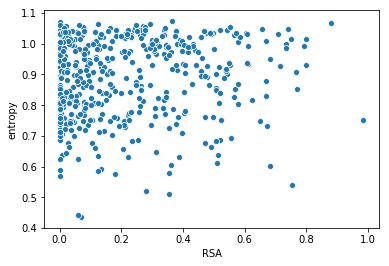

In [12]:
sns.scatterplot(x = "RSA", y = "entropy", data = df)
# sns.catterplot wasn't working earlier, but I re-installed seaborn locally and when I run this locally it works - Kate

What is happening next?

In [13]:
df['wild_type_polarity'] = df['wt'].apply(lambda x: classification[x])
df.head()


,site,RSA,A,C,D,E,F,G,H,I,...,Q,R,S,T,V,W,Y,wt,entropy,wild_type_polarity
0,18,0.170984,0.031051,0.032774,0.066396,0.130986,0.077862,0.010545,0.230710,0.057492,...,0.196481,0.325941,0.336750,0.297381,0.198282,0.063771,0.161101,T,1.007952,polar
1,19,0.168605,0.035575,0.074407,0.097060,0.050744,0.068674,0.030246,0.057919,1.135448,...,0.050284,0.059777,0.032668,0.205351,0.276241,0.083863,0.066269,I,0.859274,non-polar
2,20,0.000000,0.057711,1.578429,0.123115,0.056940,0.157598,0.053046,0.048184,0.054634,...,0.060295,0.098218,0.047429,0.044885,0.062976,0.139656,0.110007,C,0.714210,polar
3,21,0.077844,0.089144,0.100696,0.064763,0.094098,0.055839,0.038984,0.092634,1.469510,...,0.082291,0.039980,0.084321,0.099074,0.142382,0.103434,0.050375,I,0.766489,non-polar
4,22,0.005076,0.058867,0.135161,0.138590,0.079870,0.056306,1.476877,0.061189,0.051963,...,0.079329,0.068681,0.084593,0.037853,0.149194,0.105167,0.064609,G,0.764519,non-polar


In [20]:
temp = []
for name, group in df.groupby(['wild_type_polarity']):
    avg = group['RSA'].mean()
    temp.append([avg, name])
temp = pd.DataFrame(temp,columns = ['avg', 'wild_type_polarity'])
print(temp)
  


        avg wild_type_polarity
0  0.188743          non-polar
1  0.222593              polar


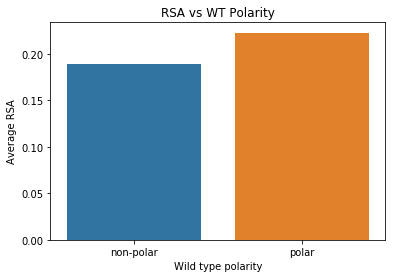

In [21]:
ax = sns.barplot(x='wild_type_polarity', y='avg', data=temp)
ax.set(xlabel="Wild type polarity", ylabel='Average RSA', title='RSA vs WT Polarity')
plt.show()

higher RSA means polarity -- proven 

Prefrences vs. wild_type vs. changed to 

In [24]:
df2 = df.drop(["entropy"], axis = 1)
df2 = pd.melt(df2, id_vars=["site", "RSA", "wt", "wild_type_polarity"], var_name="amino_acid", value_name="pref")
df2.head()

,site,RSA,wt,wild_type_polarity,amino_acid,pref
0,18,0.170984,T,polar,A,0.031051
1,19,0.168605,I,non-polar,A,0.035575
2,20,0.000000,C,polar,A,0.057711
3,21,0.077844,I,non-polar,A,0.089144
4,22,0.005076,G,non-polar,A,0.058867


In [39]:
df2["amino_acid_type"] = df2["amino_acid"].apply(lambda x: classification[x]) 
df2["change"] = df2[["wild_type_polarity", "amino_acid_type"]].apply(lambda x: "{0}TO{1}".format(x[0], x[1]), axis =1)
df2.head()

,site,RSA,wt,wild_type_polarity,amino_acid,pref,amino_acid_type,change
0,18,0.170984,T,polar,A,0.031051,non-polar,polarTOnon-polar
1,19,0.168605,I,non-polar,A,0.035575,non-polar,non-polarTOnon-polar
2,20,0.000000,C,polar,A,0.057711,non-polar,polarTOnon-polar
3,21,0.077844,I,non-polar,A,0.089144,non-polar,non-polarTOnon-polar
4,22,0.005076,G,non-polar,A,0.058867,non-polar,non-polarTOnon-polar


Graph of mean (pref) vs. change 

In [44]:
temp = []
for name, group in df2.groupby(["change"]):
    new_pref = group["pref"].mean() 
    temp.append([name, new_pref])
temp = pd.DataFrame(temp, columns = ["change", "mean_pref"])
temp.head()

,change,mean_pref
0,non-polarTOnon-polar,0.216684
1,non-polarTOpolar,0.095440
2,polarTOnon-polar,0.111937
3,polarTOpolar,0.181143


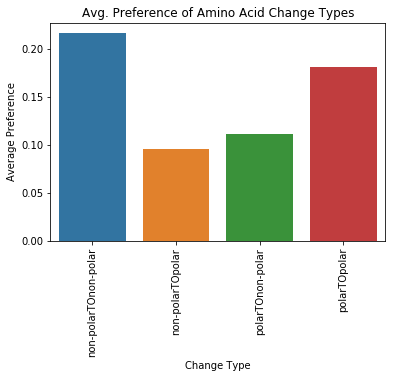

In [45]:
ax = sns.barplot(x = "change", y = "mean_pref", data = temp)
ax.set(xlabel="Change Type", ylabel='Average Preference', title='Avg. Preference of Amino Acid Change Types')
plt.xticks(rotation=90)
plt.show()

In [46]:
df3 = df.drop(["entropy"], axis = 1)
df3 = pd.melt(df3, id_vars=["site", "RSA", "wt", "wild_type_polarity"], var_name="amino_acid", value_name="pref")
df3["amino_acid_type"] = df3["amino_acid"].apply(lambda x: classification[x]) 
df3["change"] = df3[["wild_type_polarity", "amino_acid_type"]].apply(lambda x: x[0] != x[1], axis =1)
df3.head()

,site,RSA,wt,wild_type_polarity,amino_acid,pref,amino_acid_type,change
0,18,0.170984,T,polar,A,0.031051,non-polar,True
1,19,0.168605,I,non-polar,A,0.035575,non-polar,False
2,20,0.000000,C,polar,A,0.057711,non-polar,True
3,21,0.077844,I,non-polar,A,0.089144,non-polar,False
4,22,0.005076,G,non-polar,A,0.058867,non-polar,False


In [47]:
temp = []
for name, group in df3.groupby(["change"]):
    new_pref = group["pref"].mean() 
    temp.append([name, new_pref])
temp = pd.DataFrame(temp, columns = ["change", "mean_pref"])
temp.head()

,change,mean_pref
0,False,0.194659
1,True,0.104047


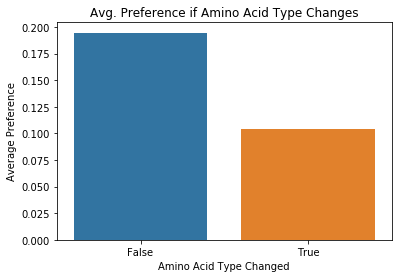

In [48]:
ax = sns.barplot(x = "change", y = "mean_pref", data = temp)
ax.set(xlabel="Amino Acid Type Changed", ylabel='Average Preference', title='Avg. Preference if Amino Acid Type Changes')
plt.show()